In [5]:
#####################################################################
# This notebook is authored by: Ayan Paul & Lina Alasfar            #
# Date: May 2022                                                    #
# If you use this code or the results from this work please cite:   # 
# Machine learning the trilinear and light-quark Yukawa couplings   #
# from Higgs pair kinematic shapes                                  #
# Lina Alasfar, Ramona Gröber, Christophe Grojean, Ayan Paul        #
# and Zuoni Qian                                                    #
# arXiv:2205.XXXXX (https://arxiv.org/abs/2005.XXXXX)               # 
#####################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
from sigma_br_HL_LHC import *
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['font.family'] = 'monospace'
## ***************************************************************************
with open('../results/confusion/HL-LHC-BDT/hh-BDT-6class-ku.confusion.json') as f:
    confusion_ul = json.load(f)
    
with open('../results/confusion/HL-LHC-BDT/hh-BDT-6class-kd.confusion.json') as f:
    confusion_dl = json.load(f)
    
with open('../results/confusion/HL-LHC-BDT/hh-BDT-5class-ku-kd.confusion.json') as f:
    confusion_ud = json.load(f)
    
with open('../results/confusion/HL-LHC-BDT/hh-BDT-5class-hhsm.confusion.json') as f:
    confusion_l = json.load(f)
    
with open('../results/confusion/HL-LHC-BDT/hh-BDT-4class-ku-only.confusion.json') as f:
    confusion_u = json.load(f)
    
with open('../results/confusion/HL-LHC-BDT/hh-BDT-4class-kd-only.confusion.json') as f:
    confusion_d = json.load(f)
    
LambdaNP2 = 1e+3**2
v4 = 246.**4
v3 = 246.**3
mh2 = 125.1**2
sqrt_2 = np.sqrt(2.0)

kltoCH = lambda x : LambdaNP2/v4*mh2*0.5*(1-x)
kutoCuH = lambda x : LambdaNP2/v3*(sqrt_2*2.2e-3*(1-x))
kdtoCdH = lambda x : LambdaNP2/v3*(sqrt_2*4.7e-3*(1-x))
unity = lambda x : x

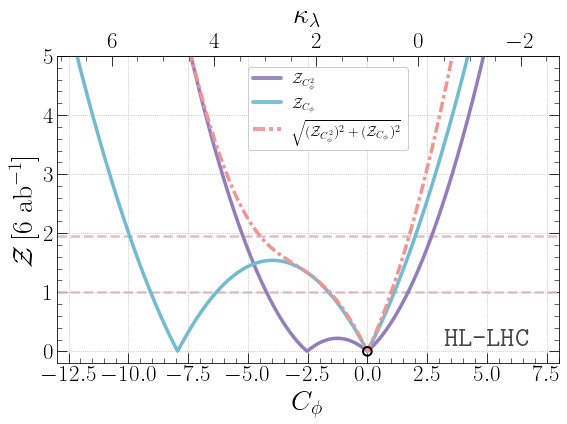

In [7]:
chisq = lambda x: ((sigmahh_kl(x, 'tri', confusion_l) - sigmahh_kl(1., 'tri', confusion_l))**2/sigmahh_kl(1., 'tri', confusion_l) 
                   + (sigmahh_kl(x, 'int', confusion_l) - sigmahh_kl(1., 'int', confusion_l))**2/sigmahh_kl(1., 'int', confusion_l)) - 1

sol = []
for i in [0, 2]:
    z = fsolve(chisq, i)
    sol.append(z[0])
sol = kltoCH(np.array(sol))

fig, ax = plt.subplots(1, figsize=(8, 6))
colpastil = ['#937eba','#72bbd0','#f09494','#91f0a1']
X = np.linspace(-5, 12, 1000)
Y1 = abs((sigmahh_kl(X, 'tri', confusion_l) - sigmahh_kl(1., 'tri', confusion_l)))/np.sqrt(sigmahh_kl(1., 'tri', confusion_l))
Y2 = abs((sigmahh_kl(X, 'int', confusion_l) - sigmahh_kl(1., 'int', confusion_l)))/np.sqrt(sigmahh_kl(1., 'int', confusion_l))
YS = np.sqrt(Y1**2 + Y2**2)
X = kltoCH(X)

plt.axhline(y=1.960, color='#E4B4C2', linewidth=2.5, alpha=0.9, linestyle='dashed')
plt.axhline(y=1., color='#E4B4C2', linewidth=2.5, alpha=0.9, linestyle='dashed')
plt.plot(X, Y1, color=colpastil[0], linewidth=3.5, alpha=1)
plt.plot(X, Y2, color=colpastil[1], linewidth=3.5, alpha=1)
plt.plot(X, YS, color=colpastil[2], linewidth=3.5, alpha=1, linestyle=(0, (3, 1, 1, 1)))
plt.scatter([0.], [0.], s=75, zorder=25, facecolors='none', edgecolors='black', linewidth=2)

labels = [r'$\mathcal{Z}_{C_\phi^2}$', r'$\mathcal{Z}_{C_\phi}$', r'$\sqrt{(\mathcal{Z}_{C_\phi^2})^2 + (\mathcal{Z}_{C_\phi})^2}$']
line0 = Line2D([0], [0], color=colpastil[0], linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line1 = Line2D([0], [0], color=colpastil[1], linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line2 = Line2D([0], [0], color=colpastil[2], linewidth=4, linestyle=(0, (3, 1, 1, 1)), solid_capstyle='round', markersize=10, alpha=0.9)
leg = plt.figlegend(handles=[line0, line1, line2], labels=labels, bbox_to_anchor=[0.575, 0.85],
                    loc='upper center', prop={'size': 14}, fancybox=True, framealpha=1, columnspacing=1,
                    ncol=1)

plt.xlim((-13, 8))
plt.ylim((-0.2, 5))
plt.xlabel(r'$C_\phi$', fontsize=28)
plt.ylabel(r'$\mathcal{Z}\, [6\;\mathrm{ab}^{-1}]$', fontsize=28)
plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=23)
plt.tick_params(axis="y", labelsize=23)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.annotate('HL-LHC', xy=(5, 0), xycoords='data', horizontalalignment='center',
                verticalalignment='bottom', fontsize=28, fontweight='900', zorder=100, color='#474747')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off)
)
def xinverse(x):
    return kltoCH(x)

def xforward(x):
    return CHtokl(x)
secax = ax.secondary_xaxis('top', functions=(xforward, xinverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r"$\kappa_\lambda$", fontsize=28,labelpad=10)
plt.grid(linestyle=':')
plt.tight_layout()
plt.savefig('../plots/HL-LHC-sig14.pdf', dpi=300)
plt.show()

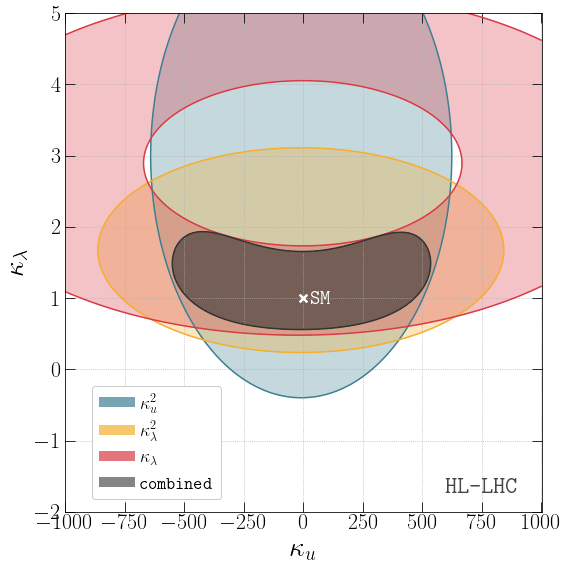

In [8]:
deltax = 0.25
deltay = 0.0025
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(-1000, 1001, deltax)
y = np.arange(-2, 5.01, deltay)
X, Y = np.meshgrid(x, y)


z3_lim = np.sqrt(sigmahh_kukl(0., 1., 'ku', confusion_ul))
Z3 = (sigmahh_kukl(X, Y, 'ku', confusion_ul) - z3_lim**2)
z4_lim = np.sqrt(sigmahh_kukl(0., 1., 'tri', confusion_ul))
Z4 = (sigmahh_kukl(X, Y, 'tri', confusion_ul) - z4_lim**2)
z5_lim = np.sqrt(sigmahh_kukl(0., 1., 'int', confusion_ul))
Z5 = (sigmahh_kukl(X, Y, 'int', confusion_ul) - z5_lim**2)


comb = np.sqrt(Z3**2/z3_lim**2 + Z4**2/z4_lim**2 + Z5**2/z5_lim**2)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z3, levels=[-z3_lim, z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, Z5, levels=[-z5_lim, z5_lim], colors='#da3b46', alpha=0.3)
plt.contour(X, Y, Z5, levels=[-z5_lim, z5_lim], colors=['#da3b46'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([0], [1], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(32, 0.98), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#ffffff')

plt.grid(linestyle=':')
plt.xlabel(r'$\kappa_u$', fontsize=28)
plt.ylabel(r'$\kappa_\lambda$', fontsize=28)

labels = [r'$\kappa_u^2$', r'$\kappa_\lambda^2$', r'$\kappa_\lambda$', 'combined']
line0 = Line2D([0], [0], color='#3f7f93', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line1 = Line2D([0], [0], color='#F6AE2D', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line2 = Line2D([0], [0], color='#da3b46', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line3 = Line2D([0], [0], color='#343434', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.6)
leg = plt.figlegend(handles=[line0, line1, line2, line3], labels=labels, bbox_to_anchor=[0.150, 0.110],
                    loc='lower left', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=0.8, ncol=1, handletextpad=0.3)

plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.annotate('HL-LHC', xy=(750, -1.8), xycoords='data', horizontalalignment='center',
                verticalalignment='bottom', fontsize=24, fontweight='900', zorder=100, color='#474747')
plt.tight_layout()
plt.savefig('../plots/HL-LHC-ku_kl_14.png', dpi=300)
plt.show()

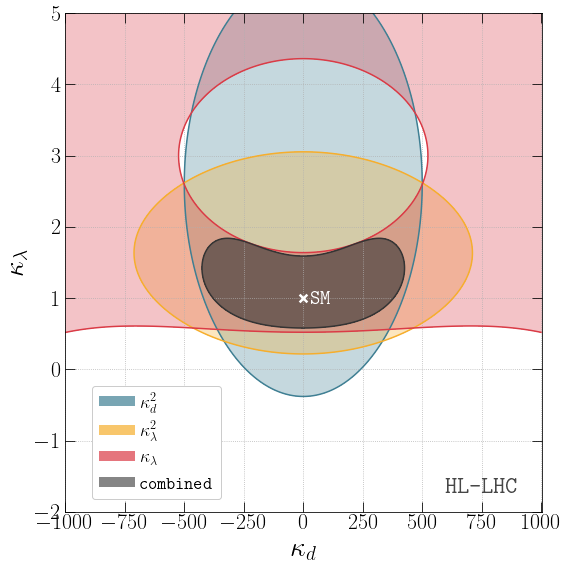

In [9]:
deltax = 0.25
deltay = 0.0025
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(-1000, 1001, deltax)
y = np.arange(-2, 5.01, deltay)
X, Y = np.meshgrid(x, y)


z3_lim = np.sqrt(sigmahh_kdkl(0., 1., 'kd', confusion_dl))
Z3 = (sigmahh_kdkl(X, Y, 'kd', confusion_dl) - z3_lim**2)
z4_lim = np.sqrt(sigmahh_kdkl(0., 1., 'tri', confusion_dl))
Z4 = (sigmahh_kdkl(X, Y, 'tri', confusion_dl) - z4_lim**2)
z5_lim = np.sqrt(sigmahh_kdkl(0., 1., 'int', confusion_dl))
Z5 = (sigmahh_kdkl(X, Y, 'int', confusion_dl) - z5_lim**2)


comb = np.sqrt(Z3**2/z3_lim**2 + Z4**2/z4_lim**2 + Z5**2/z5_lim**2)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z3, levels=[-z3_lim, z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, Z5, levels=[-z5_lim, z5_lim], colors='#da3b46', alpha=0.3)
plt.contour(X, Y, Z5, levels=[-z5_lim, z5_lim], colors=['#da3b46'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([0], [1], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(32, 0.98), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#ffffff')

plt.grid(linestyle=':')
plt.xlabel(r'$\kappa_d$', fontsize=28)
plt.ylabel(r'$\kappa_\lambda$', fontsize=28)

labels = [r'$\kappa_d^2$', r'$\kappa_\lambda^2$', r'$\kappa_\lambda$', 'combined']
line0 = Line2D([0], [0], color='#3f7f93', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line1 = Line2D([0], [0], color='#F6AE2D', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line2 = Line2D([0], [0], color='#da3b46', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line3 = Line2D([0], [0], color='#343434', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.6)
leg = plt.figlegend(handles=[line0, line1, line2, line3], labels=labels, bbox_to_anchor=[0.150, 0.110],
                    loc='lower left', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=0.8, ncol=1, handletextpad=0.3)

plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.annotate('HL-LHC', xy=(750, -1.8), xycoords='data', horizontalalignment='center',
                verticalalignment='bottom', fontsize=24, fontweight='900', zorder=100, color='#474747')
plt.tight_layout()
plt.savefig('../plots/HL-LHC-kd_kl_14.png', dpi=300)
plt.show()

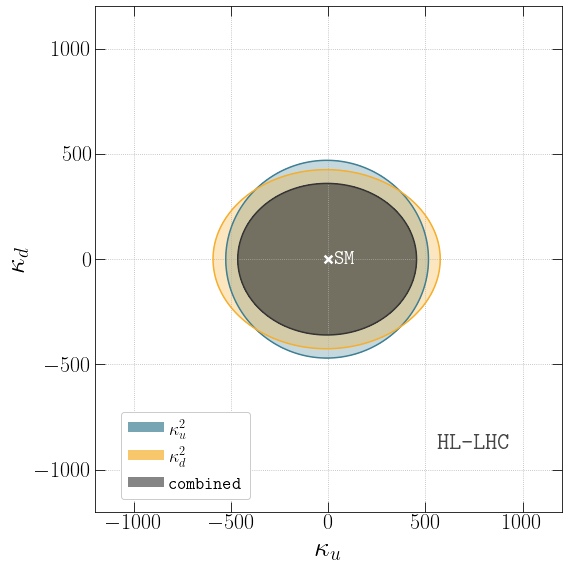

In [10]:
deltax = 0.25
deltay = 0.25
plt.rcParams['contour.negative_linestyle'] = 'solid'
x = np.arange(-1200, 1201, deltax)
y = np.arange(-1200, 1201, deltay)
X, Y = np.meshgrid(x, y)


z3_lim = np.sqrt(sigmahh_kukd(1., 1., 'ku', confusion_ud))
Z3 = (sigmahh_kukd(X, Y, 'ku', confusion_ud) - z3_lim**2)
z4_lim = np.sqrt(sigmahh_kukd(1., 1., 'kd', confusion_ud))
Z4 = (sigmahh_kukd(X, Y, 'kd', confusion_ud) - z4_lim**2)


comb = np.sqrt(Z3**2/z3_lim**2 + Z4**2/z4_lim**2)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z3, levels=[-z3_lim, 1*z3_lim], colors='#3f7f93', alpha=0.3)
plt.contour(X, Y, Z3, levels=[-z3_lim, 1*z3_lim], colors=['#3f7f93'])

plt.contourf(X, Y, Z4, levels=[-z4_lim, 1*z4_lim], colors='#F6AE2D', alpha=0.3)
plt.contour(X, Y, Z4, levels=[-z4_lim, 1*z4_lim], colors=['#F6AE2D'])

plt.contourf(X, Y, comb, levels=[0., 1.], colors='#343434', alpha=0.6)
plt.contour(X, Y, comb, levels=[0., 1.], colors=['#343434'])

plt.scatter([0], [1], color='#ffffff', zorder=100, marker='x', s=60, linewidth=2.5)
plt.annotate('SM', xy=(32, 0.98), xycoords='data', horizontalalignment='left',
                verticalalignment='center', fontsize=20, fontweight='900', zorder=100, color='#ffffff')

plt.grid(linestyle=':')
plt.xlabel(r'$\kappa_u$', fontsize=28)
plt.ylabel(r'$\kappa_d$', fontsize=28)

labels = [r'$\kappa_u^2$', r'$\kappa_d^2$', 'combined']
line0 = Line2D([0], [0], color='#3f7f93', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line1 = Line2D([0], [0], color='#F6AE2D', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.7)
line2 = Line2D([0], [0], color='#343434', linewidth=10, linestyle='-', solid_capstyle='butt', alpha=0.6)
leg = plt.figlegend(handles=[line0, line1, line2], labels=labels, bbox_to_anchor=[0.20, 0.110],
                    loc='lower left', prop={'size': 18}, fancybox=True, framealpha=1, columnspacing=0.8, ncol=1, handletextpad=0.3)

plt.locator_params(axis='y', nbins=9)
plt.locator_params(axis='x', nbins=9)
plt.tick_params(axis="x", labelsize=22)
plt.tick_params(axis="y", labelsize=22)
plt.annotate('HL-LHC', xy=(750, -925), xycoords='data', horizontalalignment='center',
                verticalalignment='bottom', fontsize=24, fontweight='900', zorder=100, color='#474747')
plt.tight_layout()
plt.savefig('../plots/HL-LHC-ku_kd_14.png', dpi=300)
plt.show()

In [11]:
chisq = lambda x: (sigmahh_ku(x, 'ku', confusion_u) - sigmahh_ku(1., 'ku', confusion_u))**2/sigmahh_ku(1., 'ku', confusion_u) - 2

for i in [-400, 400]:
    z = fsolve(chisq, i)
    print(z)

[-541.02294505]
[528.45612745]


In [12]:
chisq = lambda x: (sigmahh_kd(x, 'kd', confusion_d) - sigmahh_kd(1., 'kd', confusion_d))**2/sigmahh_kd(1., 'kd', confusion_d) - 2

for i in [-400, 400]:
    z = fsolve(chisq, i)
    print(z)

[-428.34989051]
[428.22282446]


In [13]:
def likelihood_ud(x, y):
    z3_lim = sigmahh_kukd(1., 1., 'ku', confusion_ud)
    z4_lim = sigmahh_kukd(1., 1., 'kd', confusion_ud)
    
    return -((sigmahh_kukd(x, y, 'ku', confusion_ud) - z3_lim)**2/z3_lim 
            + (sigmahh_kukd(x, y, 'kd', confusion_ud) - z4_lim)**2/z4_lim
            ) * 0.5

chisq = lambda x: ((sigmahh_kukd(x, 1., 'ku', confusion_ud) - sigmahh_kukd(1., 1., 'ku', confusion_ud))**2/sigmahh_kukd(1., 1., 'ku', confusion_ud) 
                   + (sigmahh_kukd(x, 1., 'kd', confusion_ud) - sigmahh_kukd(1., 1., 'kd', confusion_ud))**2/sigmahh_kukd(1., 1., 'kd', confusion_ud)) - 1

for i in [-400, 400]:
    z = fsolve(chisq, i)
    print(z)
    
    
chisq = lambda x: ((sigmahh_kukd(1., x, 'kd', confusion_ud) - sigmahh_kukd(1., 1., 'kd', confusion_ud))**2/sigmahh_kukd(1., 1., 'kd', confusion_ud) 
                   + (sigmahh_kukd(1., x, 'ku', confusion_ud) - sigmahh_kukd(1., 1., 'ku', confusion_ud))**2/sigmahh_kukd(1., 1., 'ku', confusion_ud)) - 1

for i in [-400, 400]:
    z = fsolve(chisq, i)
    print(z)

[-466.1408102]
[454.07770612]
[-359.90694746]
[359.79718444]
